<a href="https://colab.research.google.com/github/alejandrometrio/APIs_Repositorios/blob/master/Proyect1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
sales = '/content/drive/MyDrive/Data Science/Proyect/sales_predictions (2).csv'

In [2]:
df = pd.read_csv(sales)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df = df.drop(columns=['Item_Identifier'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [4]:
outletsize_nan = df['Outlet_Size'].isna().sum()
Item_Weight_nan = df['Item_Weight'].isna().sum()
print(f'NaN values for the column Outlet_Size is {outletsize_nan}')
print(f'NaN values for the column Item_Weight is {Item_Weight_nan}')

NaN values for the column Outlet_Size is 2410
NaN values for the column Item_Weight is 1463


Following the code above, we have some values missing and unless we have more context about the issue or the way the data was taken, we can not just fill these fields. There is no appropiate way to fulfil this information.

For the proper analysis of this data, those columns we'll be erased and not taken into account

In [5]:
df = df.drop(columns=['Outlet_Size', 'Item_Weight'])
df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


Then, we'll clean inconsistencies whitin the dataset

In [6]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

Summary stats for all numeric columns


In [7]:
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
df.head(15)

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
5,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Tier 3,Supermarket Type2,556.6088
6,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,Tier 3,Supermarket Type1,343.5528
7,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Tier 3,Supermarket Type3,4022.7636
8,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Tier 2,Supermarket Type1,1076.5986
9,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Tier 2,Supermarket Type1,4710.5350


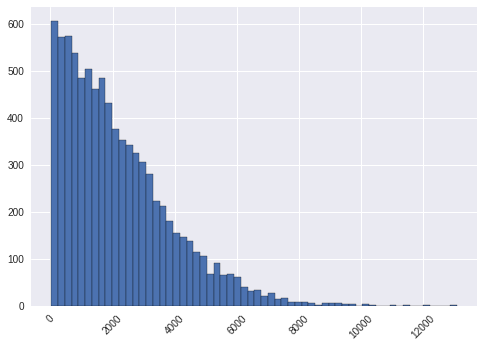

In [10]:
plt.style.use('seaborn')
df['Item_Outlet_Sales'].hist(bins = 60, edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

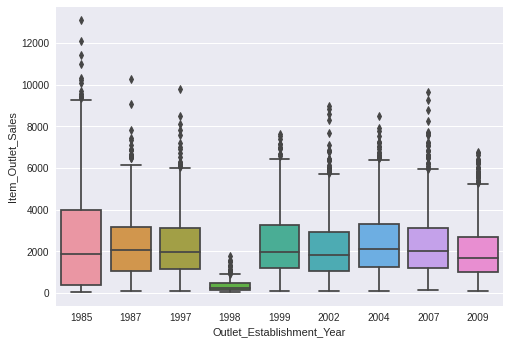

In [11]:
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df)

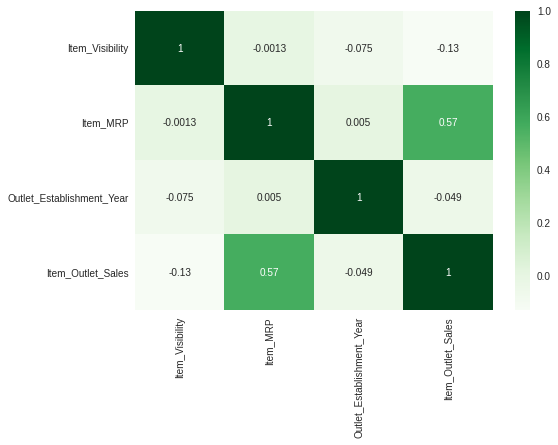

In [12]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

In [13]:
df.head(15)

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
5,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Tier 3,Supermarket Type2,556.6088
6,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,Tier 3,Supermarket Type1,343.5528
7,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Tier 3,Supermarket Type3,4022.7636
8,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Tier 2,Supermarket Type1,1076.5986
9,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Tier 2,Supermarket Type1,4710.5350


In [14]:
Item_filter = df.groupby('Item_Type')['Item_MRP'].mean().sort_values(ascending = False)
Item_filter

Item_Type
Household                149.424753
Dairy                    148.499208
Starchy Foods            147.838023
Snack Foods              146.194934
Fruits and Vegetables    144.581235
Seafood                  141.841719
Breakfast                141.788151
Breads                   140.952669
Meat                     139.882032
Canned                   139.763832
Frozen Foods             138.503366
Hard Drinks              137.077928
Others                   132.851430
Soft Drinks              131.492506
Health and Hygiene       130.818921
Baking Goods             126.380766
Name: Item_MRP, dtype: float64

In [15]:
Item_filter = Item_filter.reset_index()

In [16]:
Item_filter.describe()

,Item_MRP
count,16.000000
mean,139.868217
std,6.797963
min,126.380766
25%,136.021303
50%,140.417350
75%,144.984659
max,149.424753


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

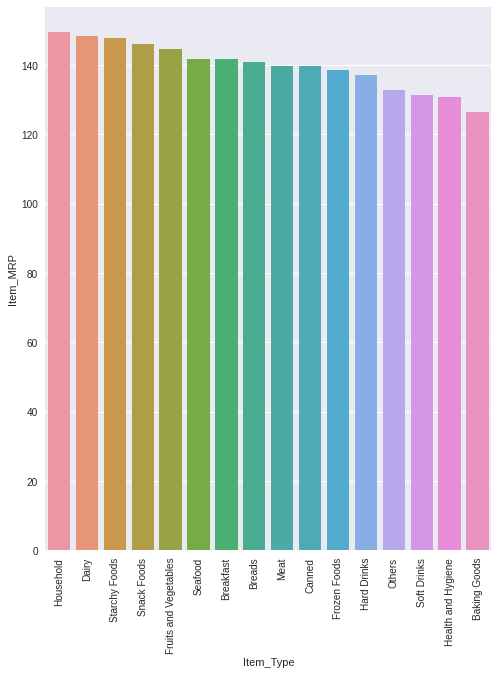

In [17]:
var = 'Item_Type'
data = pd.concat([Item_filter['Item_MRP'], Item_filter[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 10))
fig = sns.barplot(x=var, y="Item_MRP", data=data)
plt.xticks(rotation=90)

In [18]:
df.head(3)

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

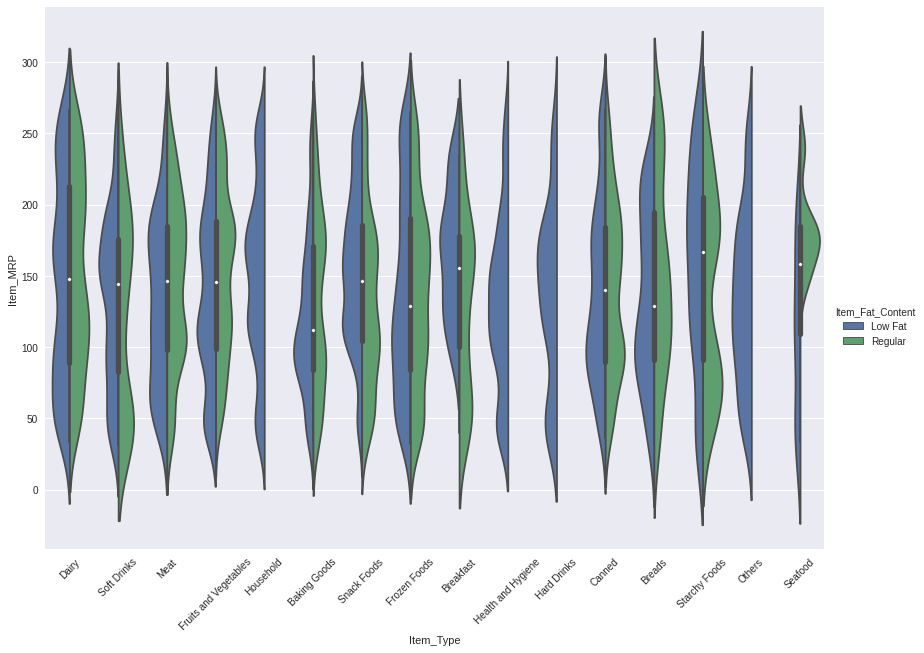

In [19]:
sns.catplot(data=df,kind="violin", x="Item_Type", y="Item_MRP", hue="Item_Fat_Content", split=True, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=45)

In [20]:
df = df.drop(columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type'])
df

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0.016047,249.8092,1999,3735.1380
1,0.019278,48.2692,2009,443.4228
2,0.016760,141.6180,1999,2097.2700
3,0.000000,182.0950,1998,732.3800
4,0.000000,53.8614,1987,994.7052
...,...,...,...,...
8518,0.056783,214.5218,1987,2778.3834
8519,0.046982,108.1570,2002,549.2850
8520,0.035186,85.1224,2004,1193.1136
8521,0.145221,103.1332,2009,1845.5976


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Visibility            8523 non-null   float64
 1   Item_MRP                   8523 non-null   float64
 2   Outlet_Establishment_Year  8523 non-null   int64  
 3   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 266.5 KB


In [22]:
from sklearn.model_selection import train_test_split

y = df['Item_Outlet_Sales']
X =df.drop(columns = 'Item_Outlet_Sales')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

# fit on train
preprocessor.fit(X_train)

# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [24]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed


0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 3)




array([[-0.71277507,  1.82810922,  1.32784893],
       [-1.29105225,  0.60336888,  1.32784893],
       [ 1.81331864,  0.24454056,  0.13618724],
       ...,
       [-0.92052713,  1.52302674,  0.49368575],
       [-0.2277552 , -0.38377708,  1.0895166 ],
       [-0.95867683, -0.73836105, -0.10214509]])

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [26]:
train_score = reg.score(X_train, y_train)
print(train_score)

0.3435334440594956


In [27]:
test_score = reg.score(X_test, y_test)
print(test_score)

0.3352062477959553


In [28]:
train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [30]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

print(f'r2 train is {r2_train}, and r2 test is {r2_test}')

r2 train is 0.3435334440594956, and r2 test is 0.3352062477959553


In [31]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

print(f'r2 train is {r2_train}, and r2 test is {r2_test}')

r2 train is 0.3435334440594956, and r2 test is 0.3352062477959553


In [32]:
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)

print(f'mse train is {mse_train}, and mse test is {mse_test}')

mse train is 1942783.693809029, and mse test is 1834150.8634067243


In [33]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

print(f'rmse train is {rmse_train}, and rmse test is {rmse_test}')

rmse train is 1393.8377573480454, and rmse test is 1354.3082601116794


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [35]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [36]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [37]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
-0.1884222525851642


In [38]:
dec_tree.get_depth()

31

In [39]:
max_depth_range = list(range(2, 31))
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

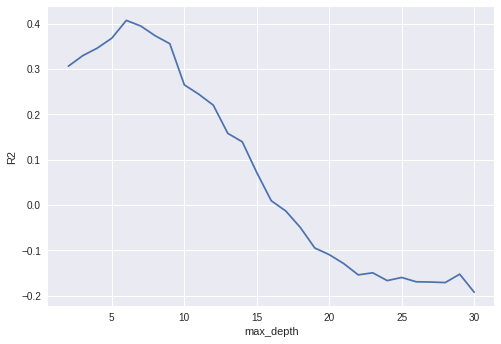

In [40]:
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [41]:
dec_tree_6 = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dec_tree_6.fit(X_train, y_train)
train_6_score = dec_tree_6.score(X_train, y_train)
test_6_score = dec_tree_6.score(X_test, y_test)
print(train_6_score)
print(test_6_score)

0.4445200336218832
0.4069891455353942
